# SIN / COS Approximation

Ping-Pong Postionsberechnung
$$ pp( \vec{x}) \mapsto y$$
mit $$ \vec{x} \in \mathbb{Z}^3$$ und $$y \in \mathbb{Z}$$
und $$ kgV(ping,pong) = 1 $$


In [120]:
function pp(n,ping=3,pong=4) 
    n = n-1 # Start at point 1
    step = 1
    pos = 0
    if gcd(ping,pong) != 1 
        return -1
    end
    for i in 1:n
        pos += step
        if (i%ping==0) !== (i%pong==0)
            step *= -1
        end
    end
    return pos
end

pp (generic function with 3 methods)

### Beispiel mit ping=3 und pong=4


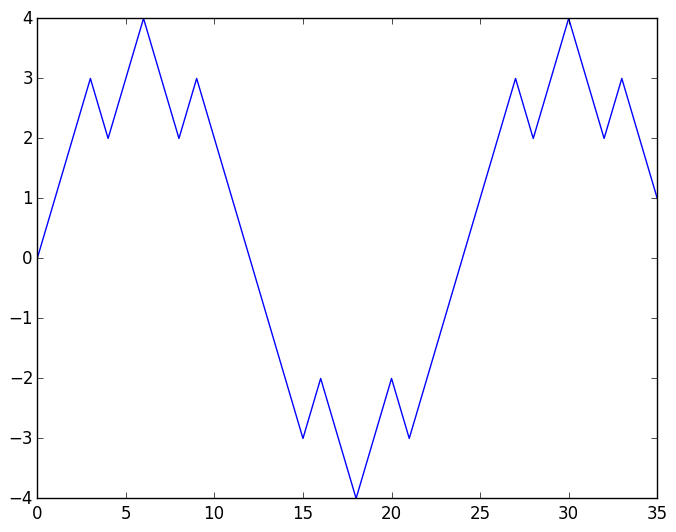

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12c1faa90>

In [121]:
using PyPlot;
ydata = [pp(i) for i in 1:36]
plot(ydata)


### Zahlenpare für symmetrisches Ping-Pong Spiel

Gesucht: Alle Zahlenpaare (Ping/Pong) mit der Bedingung, 
dass $$ kgV(ping/pong)=1$$ und $$ggT(ping,pong) \in 2\mathbb{Z}$$
also $$ ping \cdot pong \in 2\mathbb{Z}$$

done

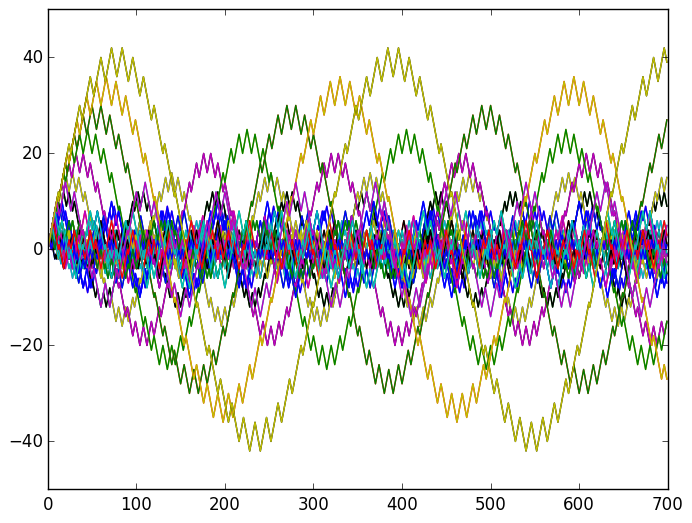

In [122]:
oG = 13
nmax = 700
ppList = Array{Int8,1}[]
for j in 2:oG
    for k in 2:oG
        if gcd(j,k)==1 && iseven(j*k) 
            tmp=Int8[j,k]
            push!(ppList,tmp)
        end
    end
end

ymap = [pp(n,e[1],e[2]) for n in 1:nmax, e in ppList]
plot(ymap)
print("done")





### Es besteht die Vermutung, dass eine möglichst gute Approximation eine grosse Periode hat. 

Also $$ max(ping,pong) $$ 



- Wir wählen also eine Primzahl p als Ping
- und p+1 als Pong



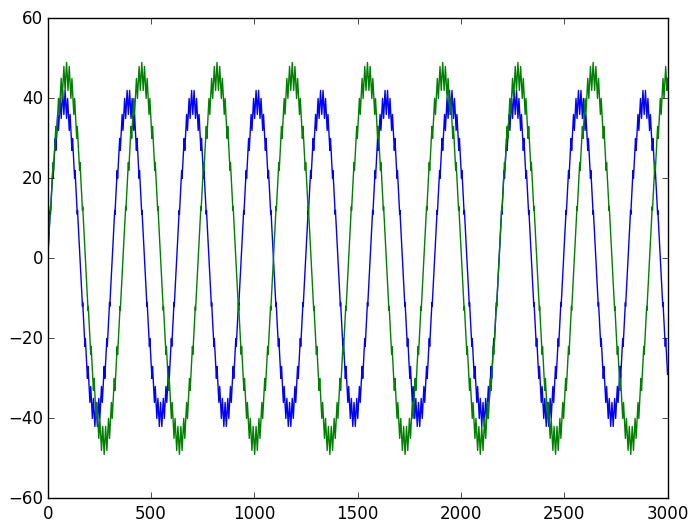

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12b680c10>
 PyObject <matplotlib.lines.Line2D object at 0x12b680e90>

In [123]:
prim = 13
y = [pp(n,prim,prim+i) for n in 1:3000, i in -1:2:1]
plot(y)

### Wähle als ping eine Primzahl in der Nähe

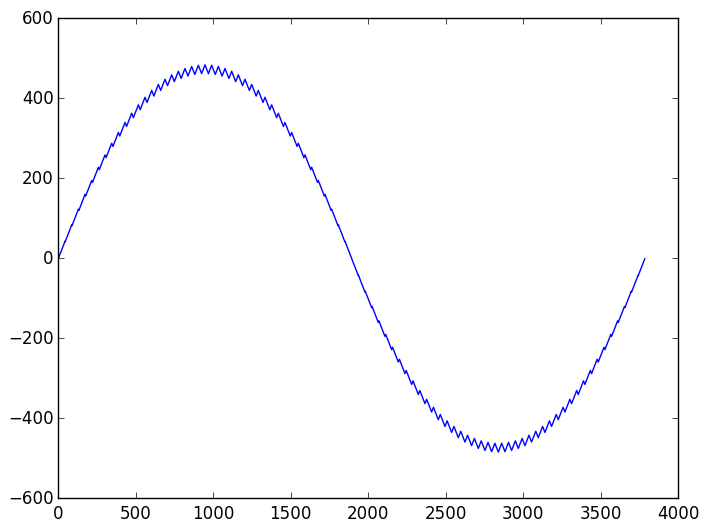

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12cb17b10>

In [124]:
pri = primes(45)
ping=last(pri)
pong=ping+1
y = [pp(n,ping,pong) for n in 1:2*ping*pong]
plot(y)
 

Numerische Werte skalieren, damit die Periode 2$\pi$ und die Amplitude 1 wird

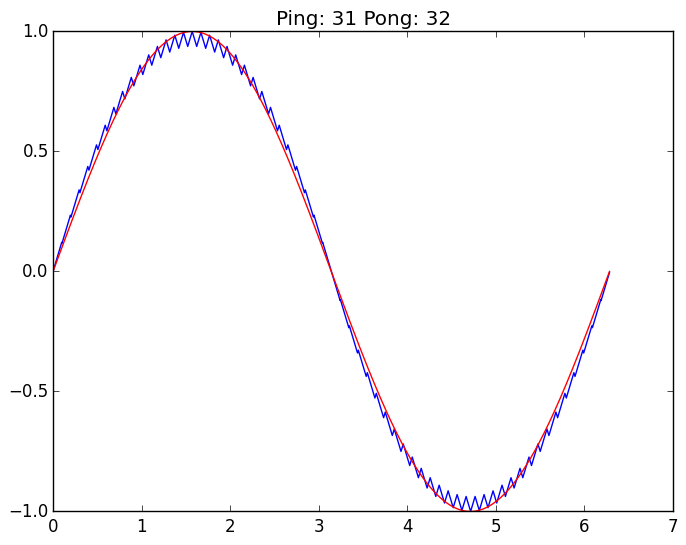

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12ccbdd10>
 PyObject <matplotlib.lines.Line2D object at 0x12ccbdf90>

In [125]:
pri = primes(33)
ping=last(pri)
pong=ping+1
y = [pp(n,ping,pong) for n in 1:2*ping*pong]
ymax = maximum(y)
y2 = 1.0/ymax*y
x = linspace(0,2*pi,2*ping*pong)
y3 = sin(x)
title("Ping: $(ping) Pong: $(ping+1)")
plot(x, y2,"b-", x,y3,"r-", linewidth=1.0)


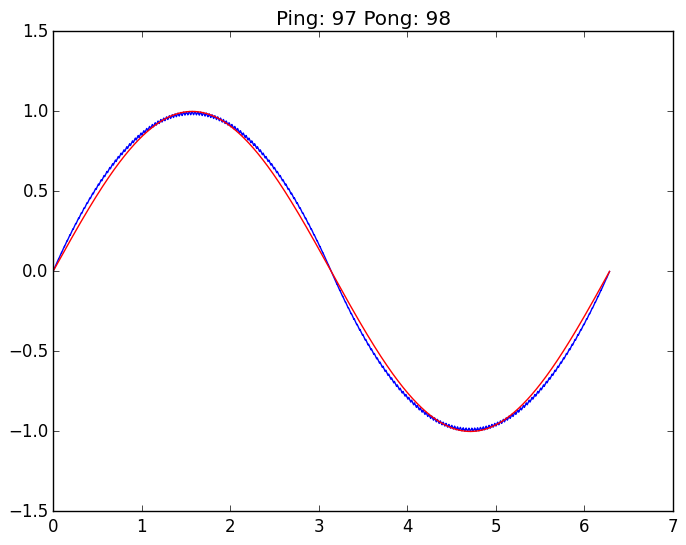

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12cce8b10>
 PyObject <matplotlib.lines.Line2D object at 0x12cce8d90>

In [126]:
ϵ=0.008
pri = primes(99)
ping=last(pri)
pong=ping+1
y = [pp(n,ping,pong) for n in 1:2*ping*pong]
ymax = maximum(y)
y2 = 1.0/(ymax-ϵ)*y
x = linspace(0,2*pi,2*ping*pong)
y3 = sin(x)
title("Ping: $(ping) Pong: $(ping+1)")
plot(x, y2,"b-", x,y3,"r-", linewidth=1.0)

In [127]:
A = [pp(n) for n in 1:34]

function flatten(A,w=3)
    tmp = size(A)
    l=tmp[1]
    A1 = [A[i] for i in 1:w]
    #print(A1)
    A2 = [sum(A[i-w:i+w])/(2*w+1) for i in w+1:l-w]
    #print (A2)
    A3 = [A[i] for i in l-w+1:l]
    #print(A3)
    return [A1;A2;A3]
    
end


flatten (generic function with 2 methods)

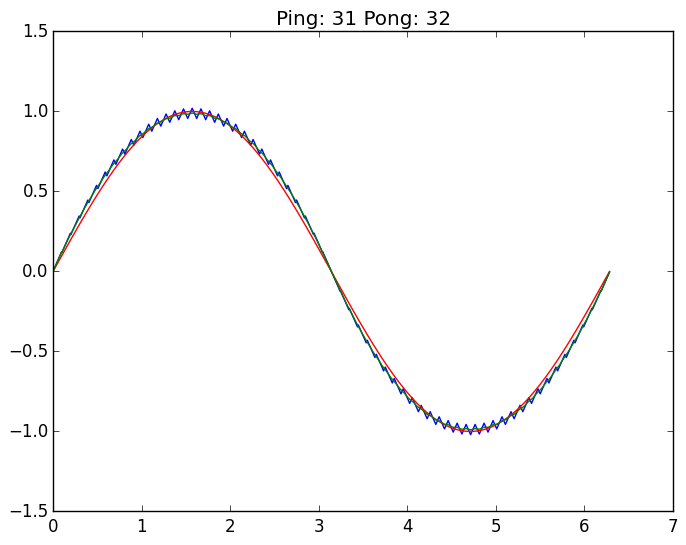

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12ce88490>
 PyObject <matplotlib.lines.Line2D object at 0x12ce88710>
 PyObject <matplotlib.lines.Line2D object at 0x12ce88dd0>

In [128]:
ϵ=5
pri = primes(33)
ping=last(pri)
pong=ping+1
periods=1
y = [pp(n,ping,pong) for n in 1:2*periods*ping*pong]
ymax = maximum(y)
y2 = 1.0/(ymax-ϵ)*y
y4 = flatten(y2,40)
x = linspace(0,2*periods*pi,2*periods*ping*pong)
y3 = sin(x)
title("Ping: $(ping) Pong: $(ping+1)")
plot(x, y2,"b-", x,y3,"r-",x,y4,"g-", linewidth=1.0)

### Fourier Analyse

(993,)(993,)(1984,)

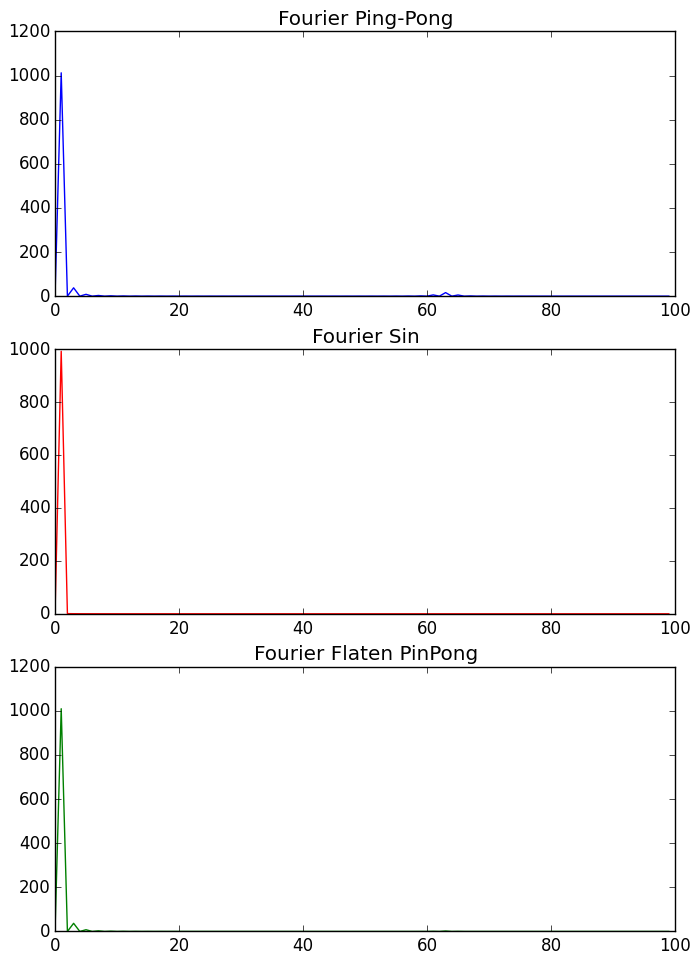

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1302a5690>

In [190]:
b1 = abs(rfft(y3))
b2 = abs(rfft(y2))
b3 = abs(rfft(y4))

x = linspace(0,2*pi/(ping*pong*periods),int(periods*ping*pong/4)+1)
#ylim((-0.003,0.007))
#plot(b1,"r-",b2,"b-",b3,"g-", linewidth=1.0)
subplots_adjust(top=1.6)
subplot(311)
title("Fourier Ping-Pong")
print(size(x))
print(size(b2))
print(size(y2))


plot(b2[1:100],"b-", linewidth=1.0)

subplot(312)
title("Fourier Sin")
plot(b1[1:100],"r-", linewidth=1.0)

subplot(313)
title("Fourier Flaten PinPong")
plot(b3[1:100],"g-", linewidth=1.0)

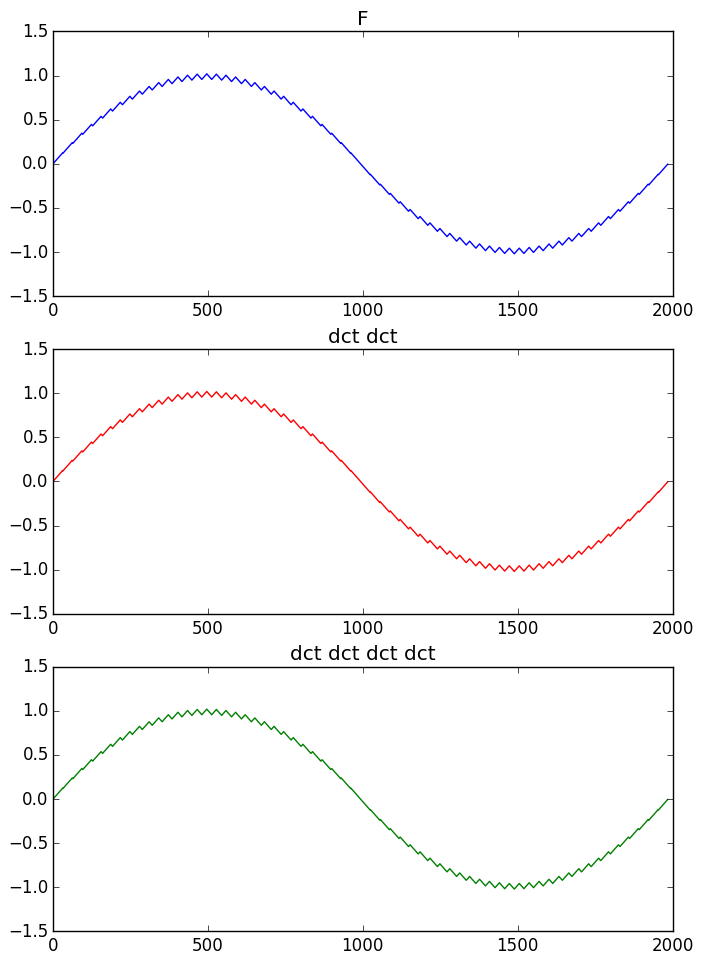

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12d27e490>

In [141]:
subplots_adjust(top=1.6)
subplot(311)
title("F")
plot(y2,"b-", linewidth=1.0)

subplot(312)
title("dct dct")
plot(idct(dct(y2)),"r-", linewidth=1.0)

subplot(313)
title("dct dct dct dct")
plot(idct(dct(idct(dct(y2)))),"g-", linewidth=1.0)

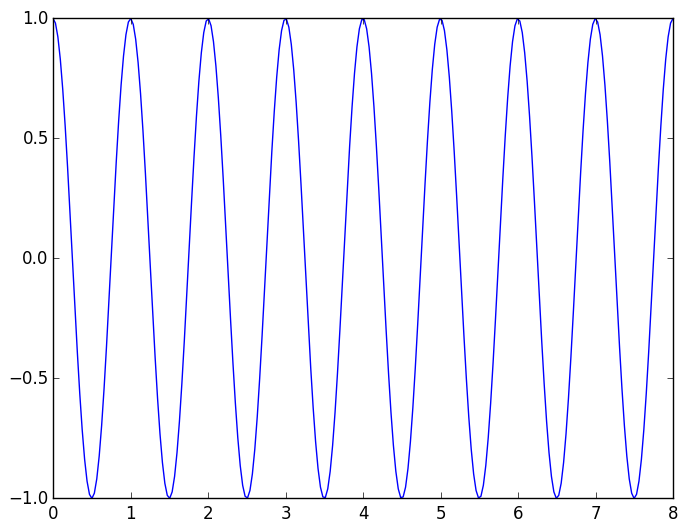

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12d5e76d0>

In [156]:

freq = 1.0
N = 256
duration = 8 / freq
t = linspace(0, duration, N)
x = cos(2 * pi * freq * t)

plot(t, x)


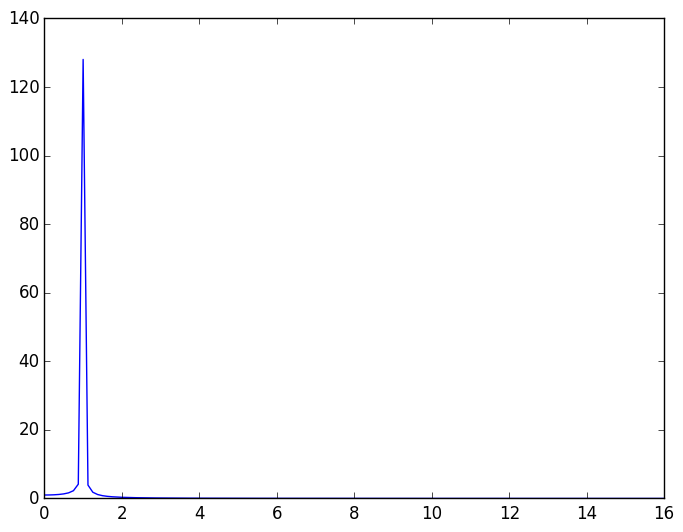

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12d6146d0>

In [157]:
X = rfft(x)
sampRate = N / duration
f = linspace(0, sampRate / 2, int(N / 2) + 1)
magX = abs(X)
plot(f, magX)

### numerische Ableitung


In [195]:
@which (Base.diff([3,4]))

diff(a::AbstractArray{T,1}) at linalg/generic.jl:35

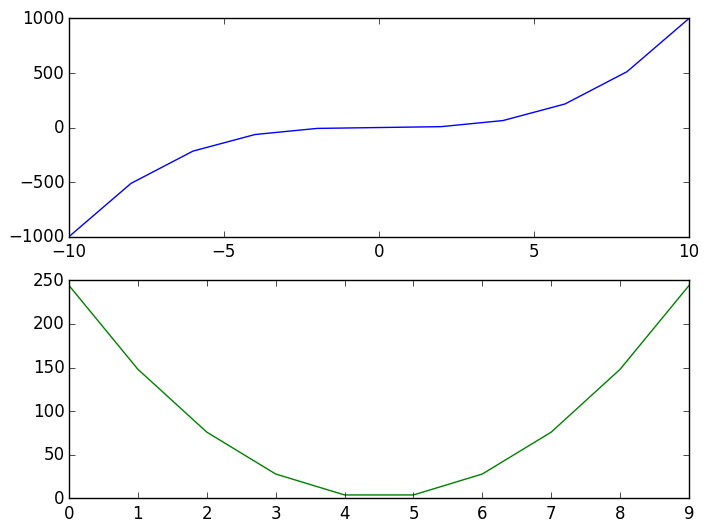

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1320605d0>

In [208]:
x = [i for i in -10:2:10]
y = x.^3


dx = diff(x)
dy = diff(y)
dydx = dy./dx

subplot(211)
plot(x,y,"b-")

subplot(212)
plot(dydx,"g-")

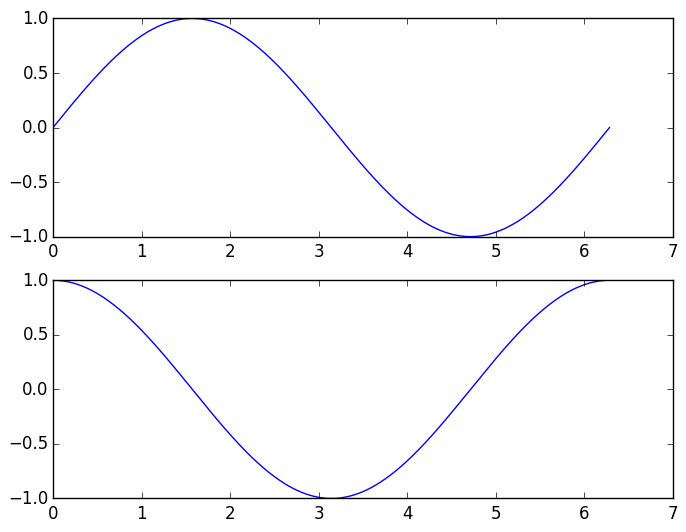

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1329b78d0>

In [215]:
n = size(y3)
x = linspace(0,2π,n[1])
dy = diff(y3)
dx = diff(x)
dydx =dy./dx


subplot(211)
plot(x,y3)
subplot(212)
plot(x[2:end],dydx)

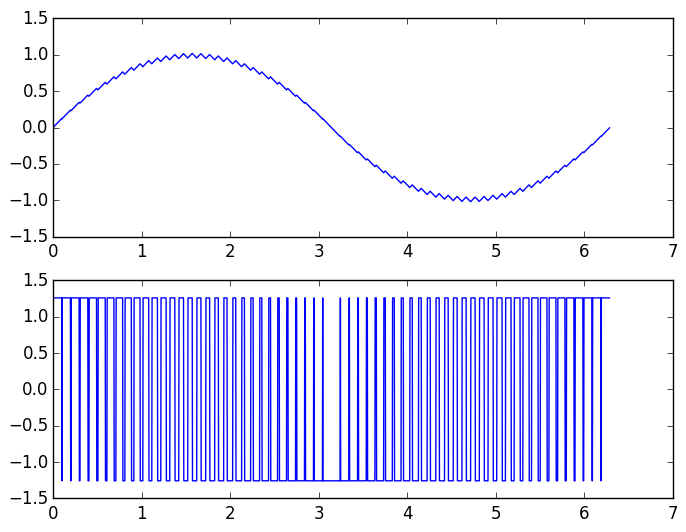

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x132c20f90>

In [217]:
n = size(y2)
x = linspace(0,2π,n[1])
dy = diff(y2)
dx = diff(x)
dydx =dy./dx


subplot(211)
plot(x,y2)
subplot(212)
plot(x[2:end],dydx)

In [220]:
help(conv)

Base.conv(u, v)

   Convolution of two vectors. Uses FFT algorithm.


[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

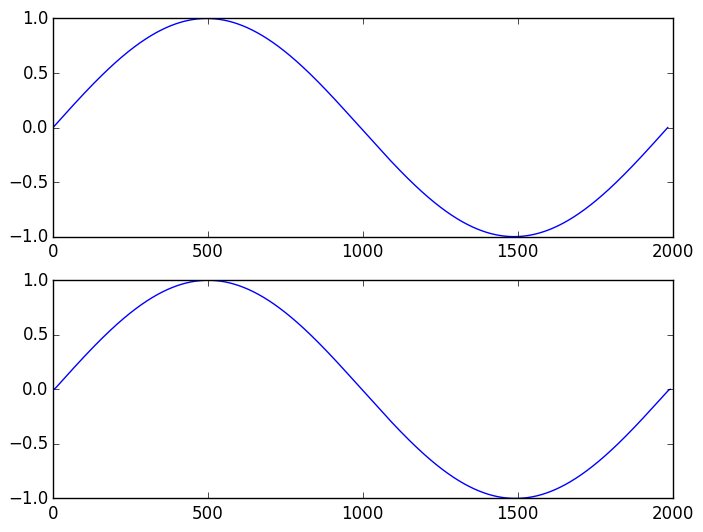

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13646bc50>

In [296]:
#ga = [exp(-((t-π)^2/1))::Float64 for t in x]
N = 10 
ga = [(1/N)::Float64 for i in 1:N]
y5 = conv(y3,ga)

subplot(211)
plot(y3)
subplot(212)
plot(y5)





16.019841983.0

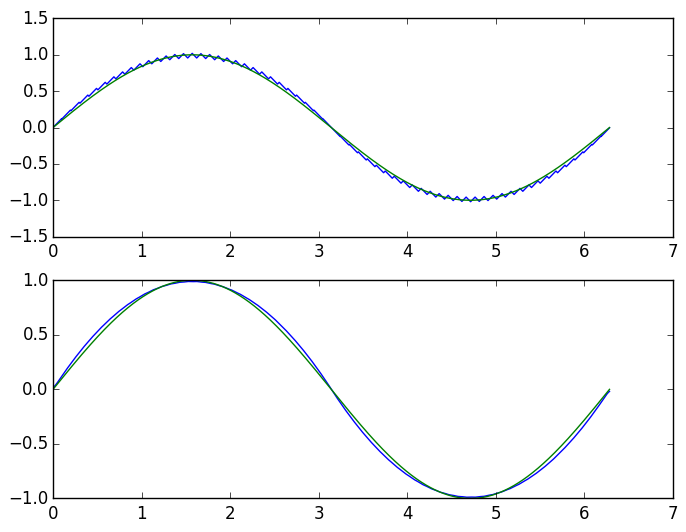

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x137c93f50>
 PyObject <matplotlib.lines.Line2D object at 0x137c7dd90>

In [328]:
n = size(y2)
x = linspace(0,2π,n[1])
N = 33
ga = [(1/N)::Float64 for i in 1:N]
y5 = conv(ga,y2)

n2=size(y5)
d = (n2[1]-n[1])/2
y6 = y5[d+1:n[1]+d]

print(d)
subplot(211)
plot(x,y2,"b-",x,sin(x),"g-")
subplot(212)
print(n[1])
print(n[1]+d-d-1)

plot(x,y6,"b-",x,sin(x),"g-")






gefaltete Kurve numerisch ableiten


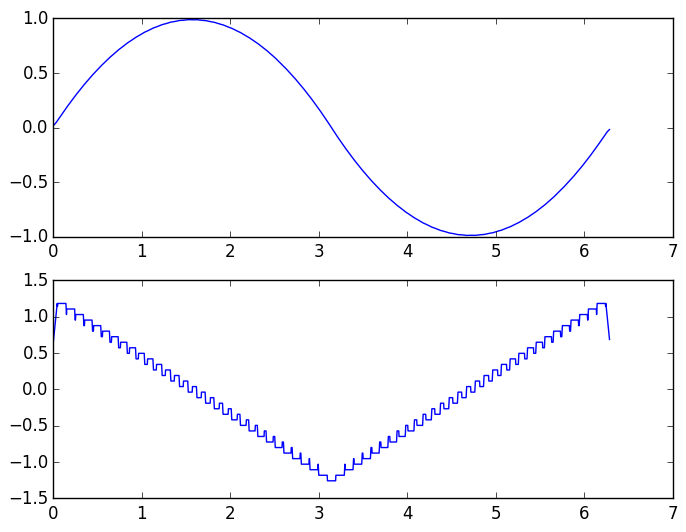

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x137e5e410>

In [329]:
n = size(y6)
x = linspace(0,2π,n[1])
dy = diff(y6)
dx = diff(x)
dydx =dy./dx


subplot(211)
plot(x,y6)
subplot(212)
plot(x[2:end],dydx)

In [334]:
x[1:6]
y6[1:6]
linreg(x[1:6],y6[1:6])[2]

0.7239503550492979

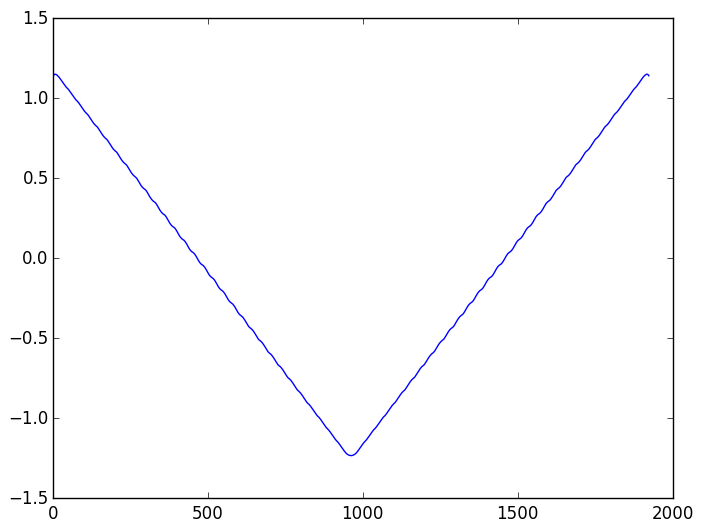

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13887d0d0>

In [339]:
k=61
le = size(y6)[1]
df = [ linreg(x[i:k+i],y6[i:k+i])[2] for i in 1:le-k]
plot(df)

Die sinus Approximaiton mit Ping-Pong ändert ihre Steigung gleichmässig